# Capstone Project Management 

### Import Needed Libraries

In [572]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN  
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation


import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



### Import Dataset

In [3]:
df = pd.read_csv('Saudi Arabia Booking.csv')#,encoding='unicode_escape')
df.head()

Name            City          region  \
0                                    الريـم          Al-Ola      Al-Madinah   
1         Copper Crown Furnished Apartments  Khamis-Mushait           Aseer   
2                        فندق راية الشلال 2    Hafrel-Batin  Eastern Region   
3  Four Points by Sheraton Makkah Al Naseem          Makkah          Makkah   
4                نزل الثريا للوحدات السكنية        Al-Tayef          Makkah   

     Price  Star_Rating                          Property_Demand  Property_id  \
0  SAR 179            5   Only 1 room left like this on our site      6330099   
1  SAR 195            5  Only 2 rooms like this left on our site      5326174   
2  SAR 200            5  Only 3 rooms like this left on our site      5987844   
3  SAR 225            5  Only 5 rooms like this left on our site      3889445   
4  SAR 250            5                                      NaN      6284346   

   Customers_Rating Customers_Review                      Type_of_room  ...  \
0               NaN              NaN               Economy Double Room  ...   
1               9.0     169 reviews   Deluxe Room (2 Adults + 1 Child)  ...   
2               8.7      17 reviews         Deluxe Double or Twin Room  ...   
3               8.7   9,418 reviews                 Superior Twin Room  ...   
4               NaN              NaN                Budget Double Room  ...   

          Canelation     Max_persons                       Bed_type  Tax  \
0  FREE cancellation  Max persons: 2      3 beds\n(3 large doubles)   No   
1  FREE cancellation  Max persons: 2  1 bed\n(1 extra-large double)   No   
2  FREE cancellation  Max persons: 2              1 bed\n(1 double)   No   
3  FREE cancellation  Max persons: 2            2 beds\n(2 singles)  Yes   
4  FREE cancellation  Max persons: 2              1 bed\n(1 double)   No   

  Review_title   Credit_card Breakfst_included Longitude_x  Latitude_y  \
0          NaN  Not requierd               NaN   37.917525   26.648656   
1      Superb   Not requierd               NaN   42.801402   18.242741   
2    Fabulous   Not requierd               NaN   45.990981   28.370666   
3    Fabulous   Not requierd               NaN   39.874312   21.380810   
4          NaN  Not requierd               NaN   40.487383   21.494524   

                                                Link  
0  https://www.booking.com/hotel/sa/lrym.en-gb.ht...  
1  https://www.booking.com/hotel/sa/kwbr-krwn-lls...  
2  https://www.booking.com/hotel/sa/fndq-ry-lshll...  
3  https://www.booking.com/hotel/sa/four-points-b...  
4  https://www.booking.com/hotel/sa/nzl-lthry-llw...  

[5 rows x 21 columns]

In [4]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

### Exclude Unneeded Columns

In [5]:
df= df.loc[:, ~df.columns.isin(['Name', 'Longitude_x','Latitude_y', 'Link','Review_title'])]

### Size of the Dataset 

In [6]:
df.shape

(1025, 16)

### Dataset Descriptive statistics Include Object type

In [7]:
df.describe(include=['O'])

City  region    Price                    Property_Demand  \
count     1025    1025     1025                                750   
unique      75      13      312                                 14   
top     Jeddah  Makkah  SAR 120  Only 1 left like this on our site   
freq       209     352       60                                148   

       Customers_Review           Type_of_room reservations_Payment  \
count               956                   1024                 1025   
unique              610                    236                    3   
top          5 reviews   One-Bedroom Apartment       No prepayment    
freq                  9                    134                  921   

               Canelation     Max_persons                       Bed_type  \
count                 846            1025                           1006   
unique                  1              12                             65   
top     FREE cancellation  Max persons: 2  1 bed\n(1 extra-large double)   
freq                  846             899                            277   

         Tax   Credit_card   Breakfst_included  
count   1025          1025                  84  
unique     2             2                   1  
top      Yes  Not requierd  Breakfast included  
freq     805           922                  84

### Information about a DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  1025 non-null   object 
 1   region                1025 non-null   object 
 2   Price                 1025 non-null   object 
 3   Star_Rating           1025 non-null   int64  
 4   Property_Demand       750 non-null    object 
 5   Property_id           1025 non-null   int64  
 6   Customers_Rating      956 non-null    float64
 7   Customers_Review      956 non-null    object 
 8   Type_of_room          1024 non-null   object 
 9   reservations_Payment  1025 non-null   object 
 10  Canelation            846 non-null    object 
 11  Max_persons           1025 non-null   object 
 12  Bed_type              1006 non-null   object 
 13  Tax                   1025 non-null   object 
 14  Credit_card           1025 non-null   object 
 15  Breakfst_included    

### Detect Missing Values

In [9]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=" ")
print('\n')
df = df2

List of dropped columns: Breakfst_included 



<AxesSubplot:>

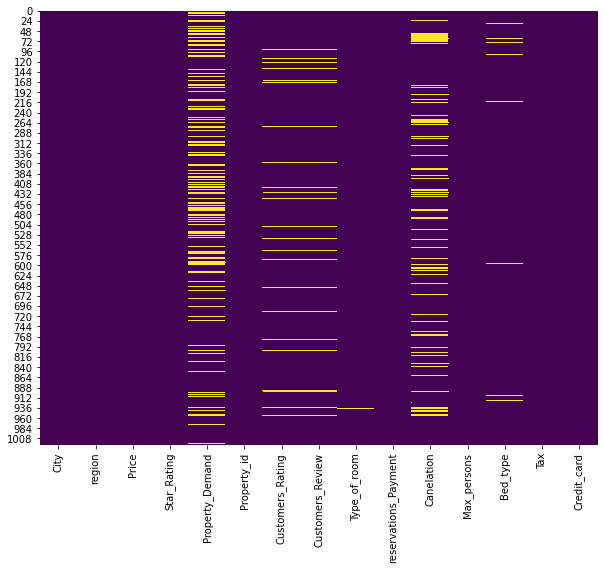

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [11]:
df.isnull().sum()

City                      0
region                    0
Price                     0
Star_Rating               0
Property_Demand         275
Property_id               0
Customers_Rating         69
Customers_Review         69
Type_of_room              1
reservations_Payment      0
Canelation              179
Max_persons               0
Bed_type                 19
Tax                       0
Credit_card               0
dtype: int64

### Replace Some Columns Values

In [12]:
df['Canelation']=df['Canelation'].replace('FREE cancellation','FREE')

### Sort the DataFrame by 'Star_Rating' Columns

In [13]:
df.sort_values(by='Star_Rating',ascending=False,inplace =True)

### Fill Missing Values

In [14]:
df['Property_Demand'].value_counts()
df['Property_Demand'].fillna('No rooms Available',inplace=True)

In [15]:
df['Customers_Rating'].value_counts()
df['Customers_Rating'].fillna(method='bfill',inplace =True)

In [16]:
df['Customers_Review'].value_counts()
df['Customers_Review']=(df['Customers_Review'].replace( '[reviews,)]','', regex=True ).astype(float))
df['Customers_Review'].fillna(df['Customers_Review'].mean(),inplace =True)

In [17]:
df['Type_of_room'].value_counts()
df['Type_of_room'].fillna('Not Specified',inplace=True)

In [18]:
df['Canelation'].value_counts()
df['Canelation'].fillna('Not FREE', inplace=True)

In [19]:
df['Bed_type'].value_counts()
df['Bed_type'].fillna('Not Specified',inplace=True)

### Change Some Columns type

In [20]:
df['Price']=(df['Price'].replace( '[SAR,)]','', regex=True ).astype(float))

df['Customers_Rating']=df['Customers_Rating'].astype(float)

df['Customers_Review']=(df['Customers_Review'].replace( '[reviews,)]','', regex=True ).astype(int))

df['Max_persons']=(df['Max_persons'].replace( '[Max persons:,)]','', regex=True ).astype(int))


### Cheack Data Outliers

<AxesSubplot:>

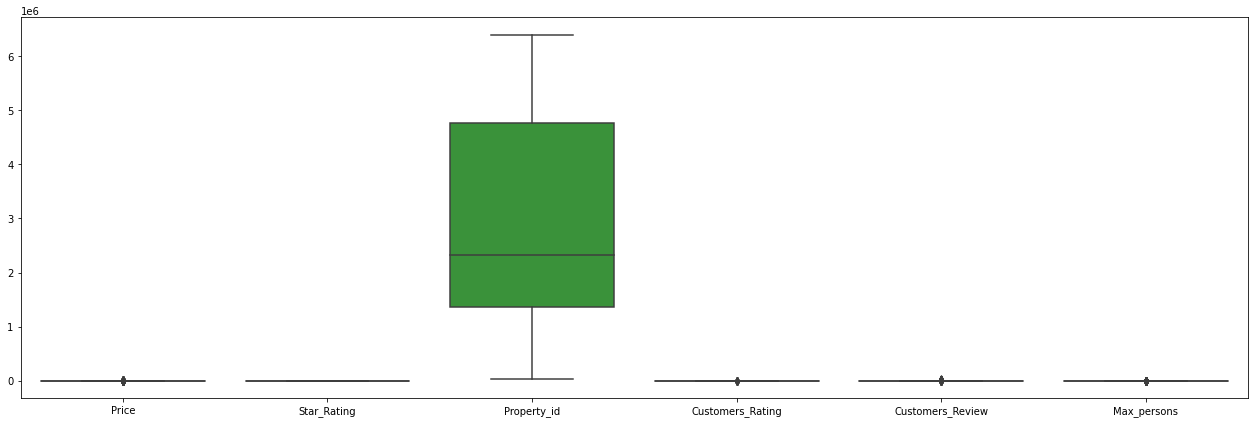

In [21]:
plt.figure(figsize=(22,7))
sns.boxplot(data=df)

### Visulization

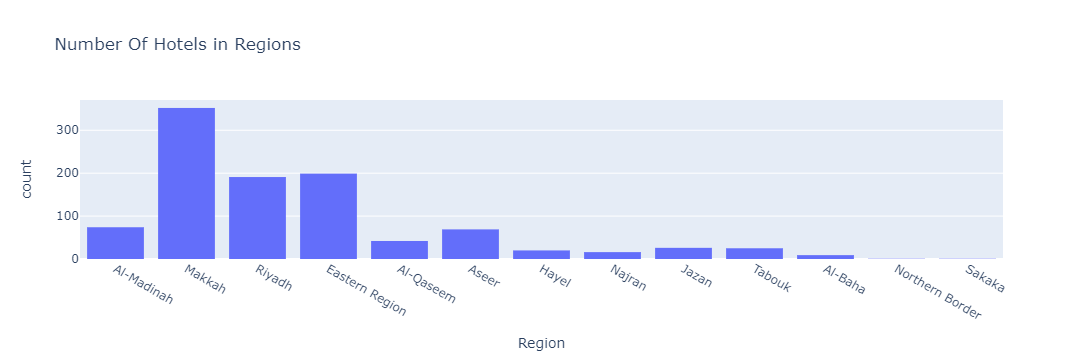

In [22]:
px.histogram(df, x = 'region', nbins = 20, title="Number Of Hotels in Regions",labels={'region':'Region', 'count':'#Hotel'})

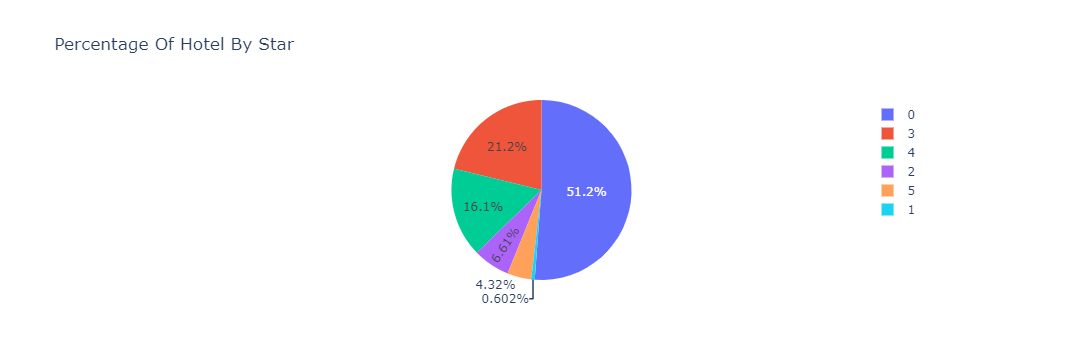

In [23]:
px.pie(df, values='Property_id', names='Star_Rating', title='Percentage Of Hotel By Star')

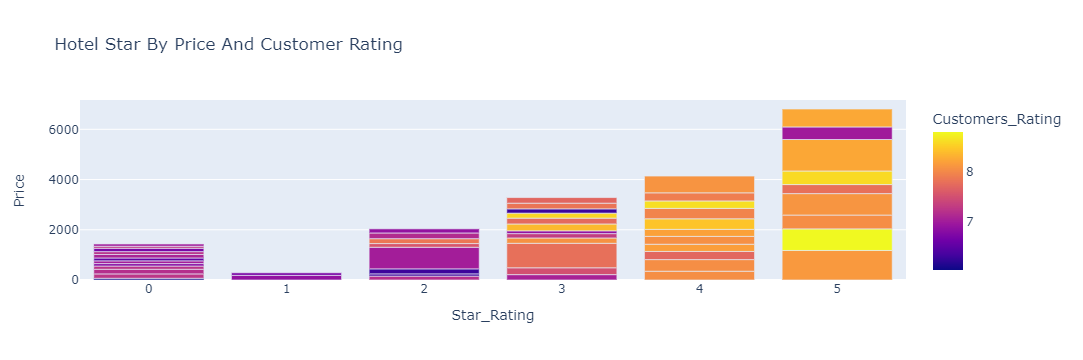

In [24]:
rig= df.groupby(['region','Star_Rating']).mean().reset_index()

px.bar( data_frame =rig, x='Star_Rating', y='Price', color='Customers_Rating', labels={'Star Rating':'Hotel Satr'},
       title="Hotel Star By Price And Customer Rating")

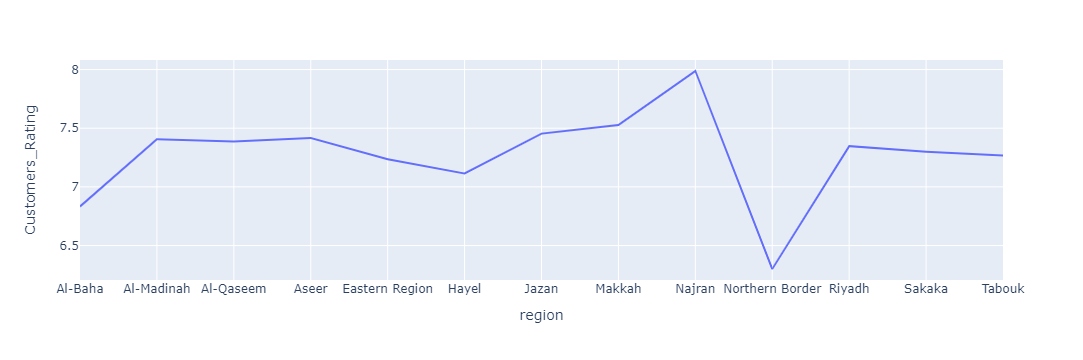

In [25]:
rig= df.groupby('region').mean().reset_index()

px.line( data_frame =rig,x='region', y='Customers_Rating')

### DataFrame Encode Values

In [565]:
objectcol=["City","Type_of_room","reservations_Payment","Canelation","Bed_type","Tax","Credit_card"]

le = LabelEncoder()
df[objectcol] = df[objectcol].apply(le.fit_transform)
df

City  region   Price  Star_Rating  Property_Demand  Property_id  \
0       27       1   179.0            5                2      6330099   
53      56       7   950.0            5                0      2258749   
61      66      10  1350.0            5                0       418602   
60      56       7  1320.0            5                0      3129791   
59      52       7  1200.0            5                9      3241649   
...    ...     ...     ...          ...              ...          ...   
664     38       2    85.0            0                3       445908   
663     52       7    85.0            0                3      2798725   
662      1       3    85.0            0                1      5510872   
661     30       7    85.0            0                0      4971607   
1024     1       3   135.0            0                5      3970957   

      Customers_Rating  Customers_Review  Type_of_room  reservations_Payment  \
0                  8.2               668            88                     0   
53                 8.2              7642           215                     1   
61                 8.6               943           134                     1   
60                 8.5              6942            49                     1   
59                 8.2              1458           114                     1   
...                ...               ...           ...                   ...   
664                8.0               713            33                     1   
663                6.0               329            33                     1   
662                7.9               100           177                     1   
661                5.9               471            66                     1   
1024               9.3               379           130                     1   

      Canelation  Max_persons  Bed_type  Tax  Credit_card  
0              0            2        32    0            0  
53             1            2        18    1            0  
61             0            2         1    1            0  
60             1            2         1    1            0  
59             1            2         1    1            0  
...          ...          ...       ...  ...          ...  
664            1            2         2    1            0  
663            0            2         1    1            0  
662            0            2         0    1            0  
661            0            2         0    1            0  
1024           0            2         1    1            0  

[1025 rows x 15 columns]

### Pairplot to show the relationship between variables 

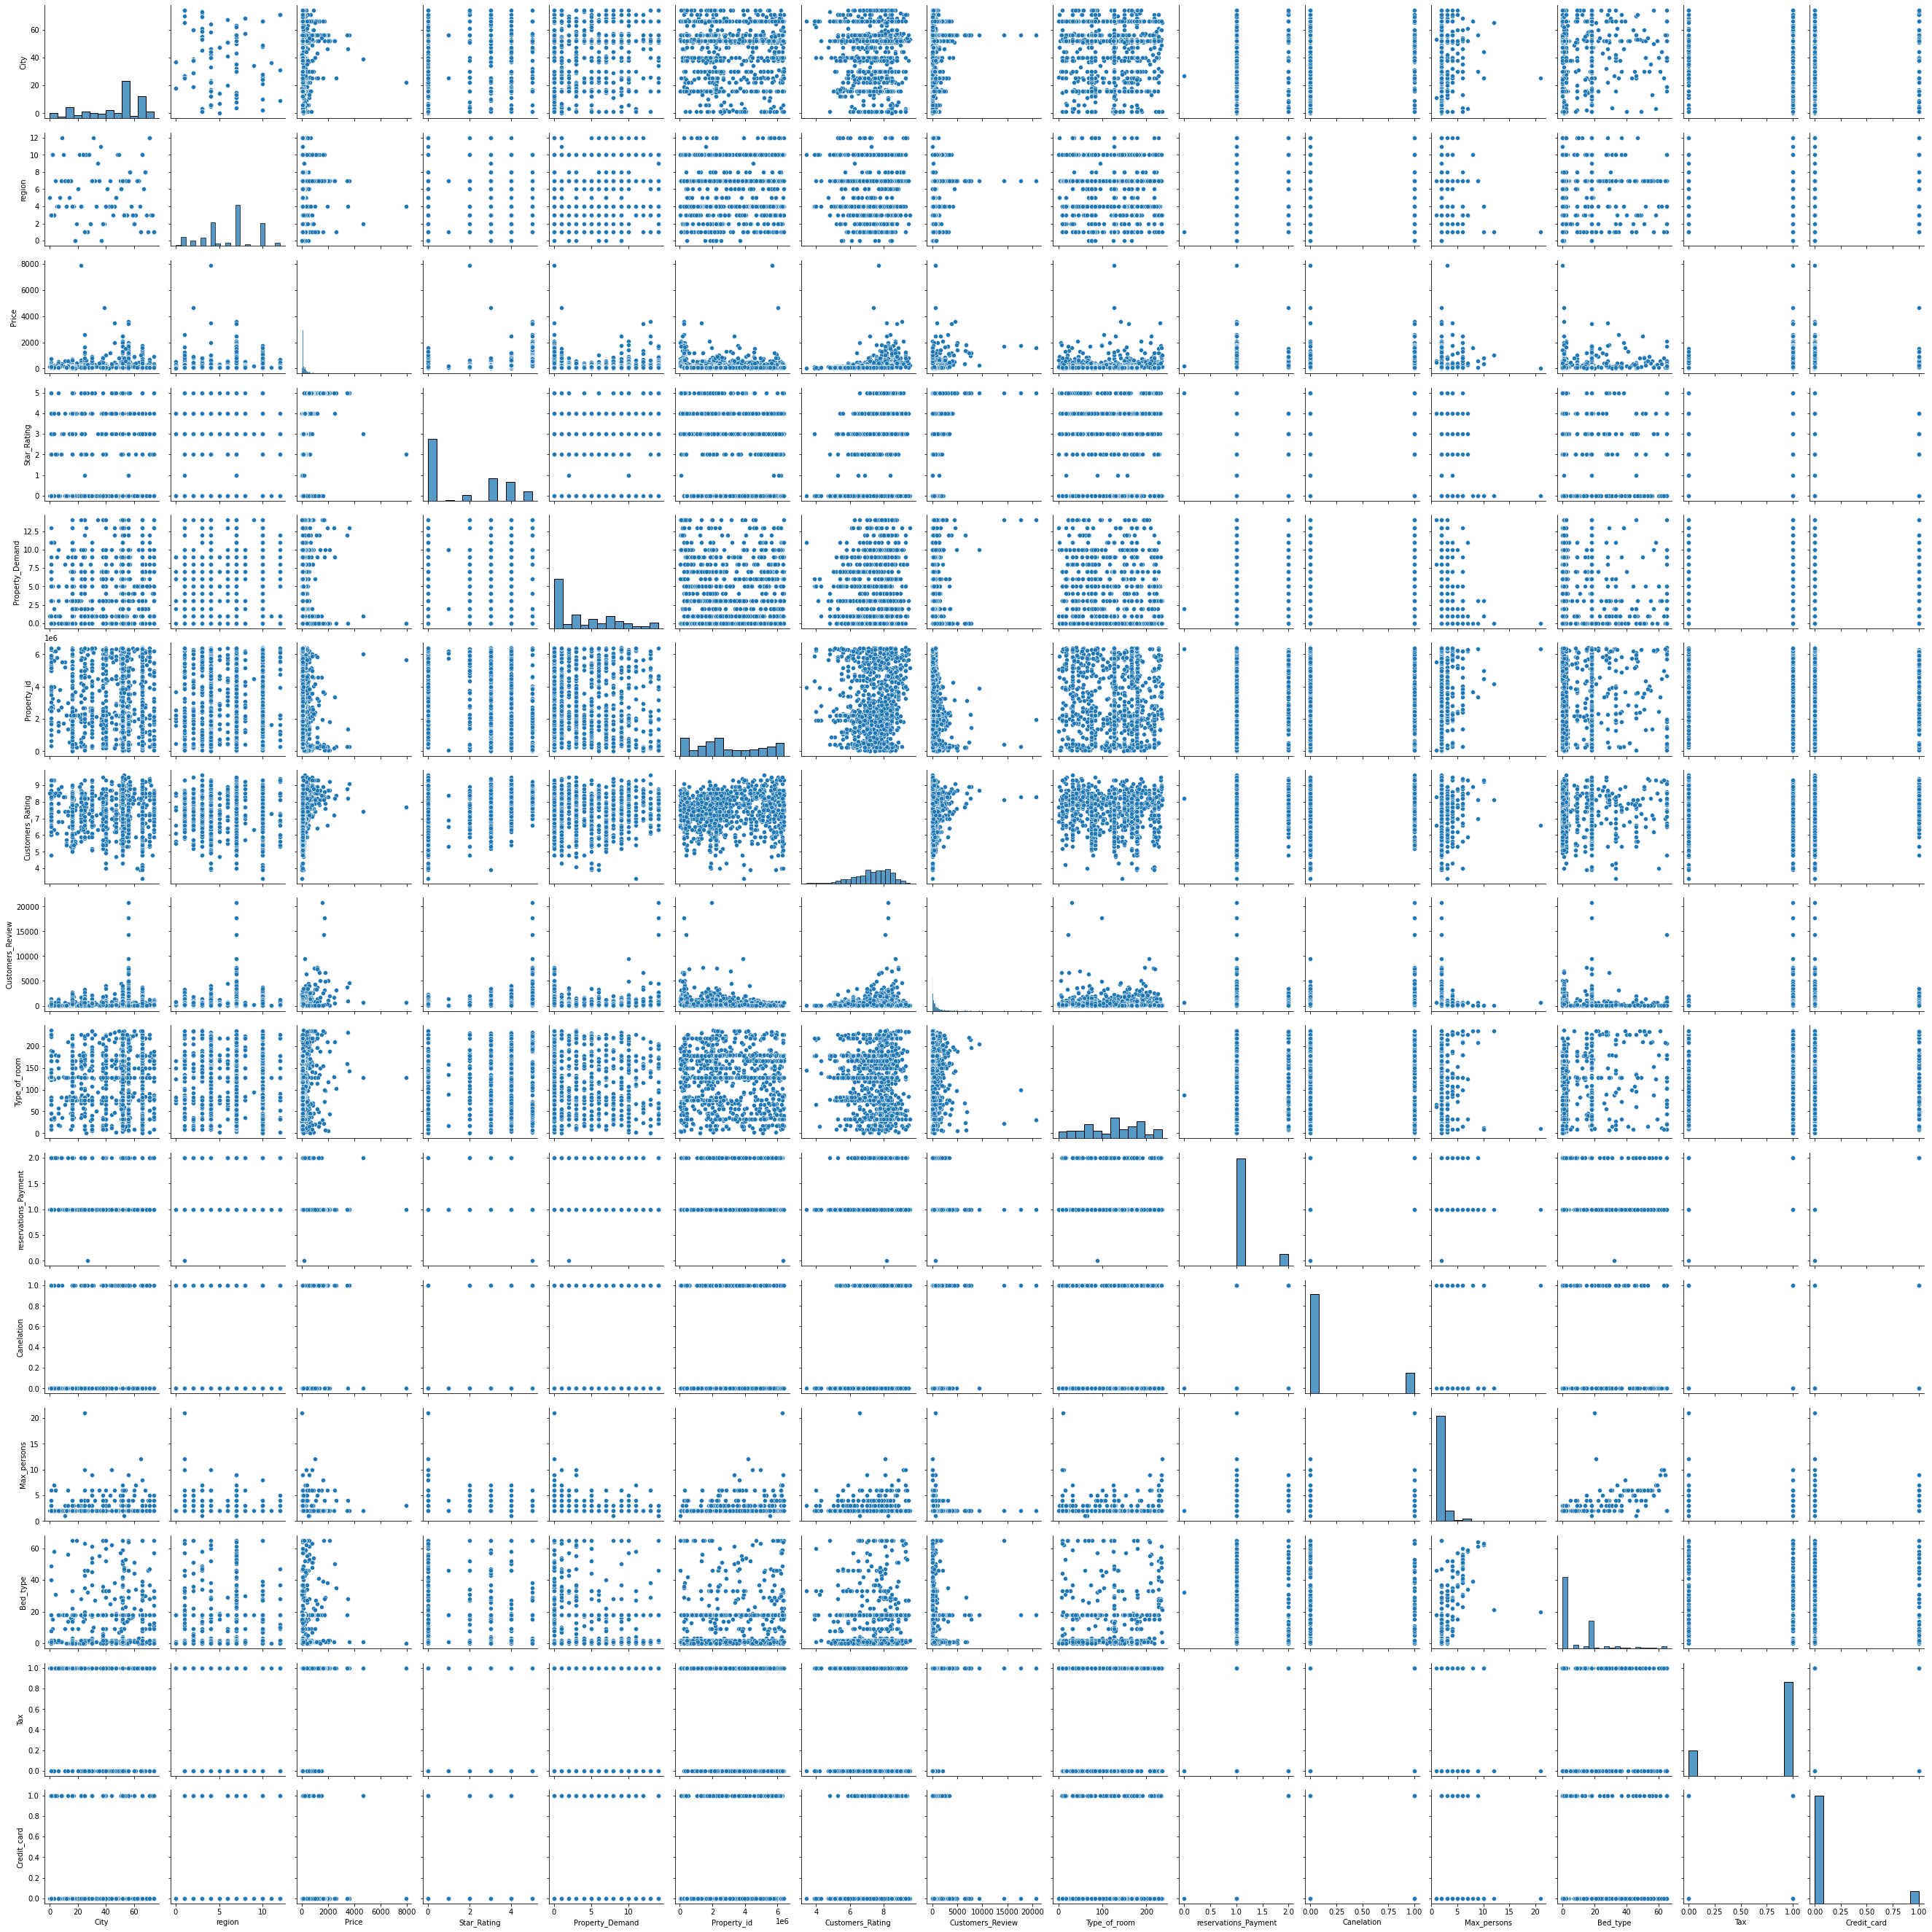

In [342]:
sns.pairplot(df)

### Show correlation between variables 

In [344]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

### Scale Data

In [345]:
X = df[['City', 'Star_Rating' ]]

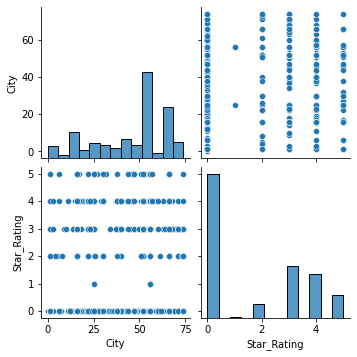

In [346]:
sns.pairplot(X)

In [347]:
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(X)
scaled_df

array([[-0.93292798,  1.74770791],
       [ 0.54757409,  1.74770791],
       [ 1.05809204,  1.74770791],
       ...,
       [-2.26027467, -0.90621891],
       [-0.7797726 , -0.90621891],
       [-2.26027467, -0.90621891]])

### The Elbow Method

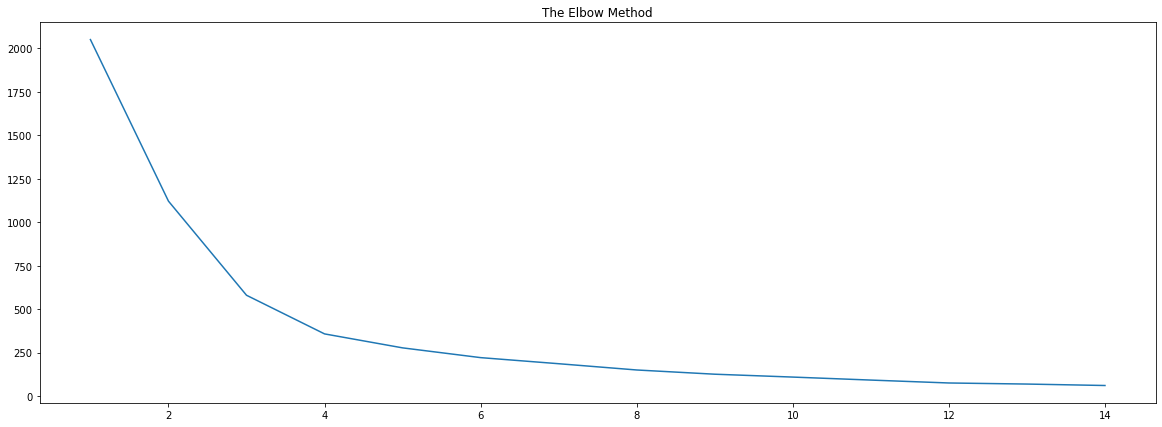

In [348]:
plt.figure(figsize = (20, 7))
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.show()

### KMeans Model

In [349]:
kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans1 = kmeans1.fit_predict(scaled_df)

In [350]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans2 = kmeans2.fit_predict(scaled_df)

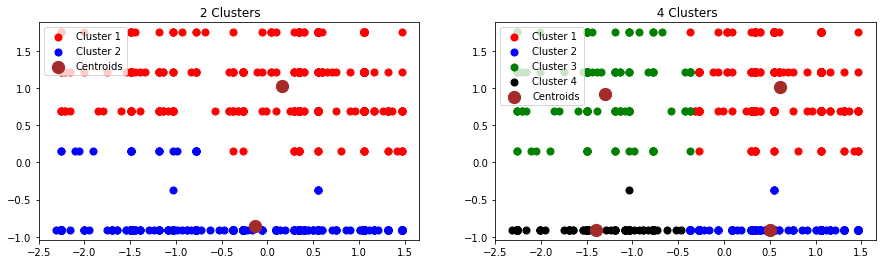

In [559]:
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
plt.scatter(scaled_df[y_kmeans1 == 0, 0], scaled_df[y_kmeans1 == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_df[y_kmeans1 == 1, 0], scaled_df[y_kmeans1 == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 150, c = 'brown', label = 'Centroids')

plt.title(' 2 Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(scaled_df[y_kmeans2 == 0, 0], scaled_df[y_kmeans2 == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_df[y_kmeans2 == 1, 0], scaled_df[y_kmeans2 == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_df[y_kmeans2 == 2, 0], scaled_df[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_df[y_kmeans2 == 3, 0], scaled_df[y_kmeans2 == 3, 1], s = 50, c = 'black', label = 'Cluster 4')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 150, c = 'brown', label = 'Centroids')

plt.title(' 4 Clusters')
plt.legend()

In [569]:
#If the ground truth labels are not known, evaluation must be performed using the model itself.

#higher Silhouette Coefficient score relates to a model with better defined clusters
print('Silhouette Coefficient score (2 Clusters):\n',silhouette_score(scaled_df, kmeans1.labels_, metric='euclidean'))
print('Silhouette Coefficient score (4 Clusters)\n',silhouette_score(scaled_df, kmeans2.labels_, metric='euclidean'))


#higher Calinski-Harabasz score relates to a model with better defined clusters.
print('\nCalinski-Harabasz score (2 Clusters)\n',calinski_harabasz_score(scaled_df, kmeans1.labels_))
print('Calinski-Harabasz score (4 Clusters)\n',calinski_harabasz_score(scaled_df, kmeans2.labels_))

#lower Davies-Bouldin index relates to a model with better separation between the clusters.
print('\nDavies-Bouldin index (2 Clusters) \n', davies_bouldin_score(scaled_df, kmeans1.labels_))
print('Davies-Bouldin index (4 Clusters) \n', davies_bouldin_score(scaled_df, kmeans2.labels_))


Silhouette Coefficient score (2 Clusters):
 0.47503418132597836
Silhouette Coefficient score (4 Clusters)
 0.5777109386090925

Calinski-Harabasz score (2 Clusters)
 848.2137270323245
Calinski-Harabasz score (4 Clusters)
 1612.601165415387

Davies-Bouldin index (2 Clusters) 
 0.9421673476802309
Davies-Bouldin index (4 Clusters) 
 0.5976750213933534


### AgglomerativeClustering Model

In [576]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_df)

array([3, 2, 2, ..., 1, 1, 1], dtype=int64)

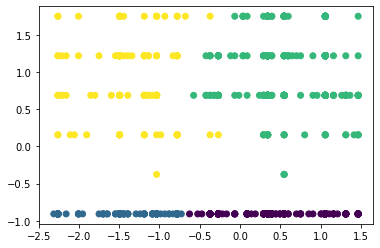

In [505]:
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=cluster.labels_)

In [568]:
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, cluster1.labels_, metric='euclidean'))
print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, cluster.labels_))
print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, cluster.labels_))

Silhouette Coefficient score:
 0.5745640244660415

Calinski-Harabasz score:
 1563.846474230153

Davies-Bouldin index: 
 0.5930261287485684


### DBSCAN Model

In [199]:
from sklearn.neighbors import NearestNeighbors

In [555]:
neigh = NearestNeighbors(n_neighbors = 4) 
nbrs = neigh.fit(X) 
distances, indices = nbrs.kneighbors(X)

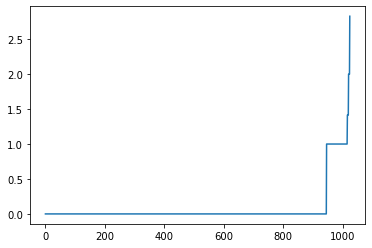

In [556]:
distances = np.sort(distances, axis = 0) 
distances = distances[: , 1] 
plt.plot(distances)

In [481]:
db = DBSCAN(eps=0.1, min_samples=2)
db.fit_predict(scaled_df)

array([-1,  0,  1, ..., 53, 45, 53], dtype=int64)

In [512]:
dbLabels = db.labels_
dbLabels

array([-1,  0,  1, ..., 53, 45, 53], dtype=int64)

In [513]:
n_clusters_ = len(set(dbLabels)) - (1 if -1 in dbLabels else 0)
n_clusters_

62

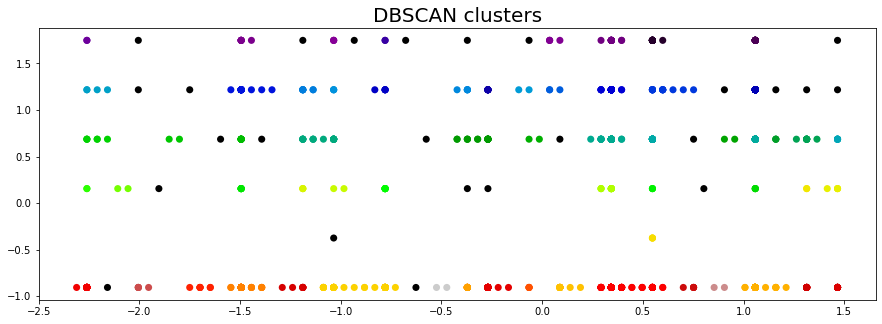

In [514]:
plt.figure(figsize=(15,5))
plt.scatter(scaled_df[:,0], scaled_df[:,1], c= dbLabels, cmap='nipy_spectral', s=50, edgecolor='none')
plt.title('DBSCAN clusters', fontsize = 20)
plt.show()

In [567]:
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, dbLabels , metric='euclidean'))
print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, dbLabels))
print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, dbLabels))


Silhouette Coefficient score:
 0.8095035872094773

Calinski-Harabasz score:
 596.4168340934419

Davies-Bouldin index: 
 1.3192145098274781


### BIRCH Model

In [363]:
birch = Birch(threshold=0.01, n_clusters=4)
birch.fit_predict(scaled_df)

array([2, 0, 0, ..., 1, 1, 1], dtype=int64)

In [508]:
bLabels = birch.labels_
bLabels

array([2, 0, 0, ..., 1, 1, 1], dtype=int64)

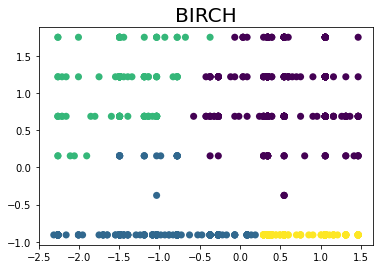

In [509]:
plt.scatter(scaled_df[:,0], scaled_df[:,1],c=bLabels, s=50, edgecolor='none')
plt.title('BIRCH', fontsize = 20)
plt.show()

In [566]:
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, bLabels, metric='euclidean'))
print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, bLabels))
print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, bLabels))


Silhouette Coefficient score:
 0.5428436261910053

Calinski-Harabasz score:
 1448.0401973994155

Davies-Bouldin index: 
 0.5903298190237146


In [577]:
model = AffinityPropagation(damping=0.9,random_state = 123 )
model.fit_predict(scaled_df)

array([0, 1, 1, ..., 7, 6, 7], dtype=int64)

In [578]:
mLabels = model.labels_
mLabels

array([0, 1, 1, ..., 7, 6, 7], dtype=int64)

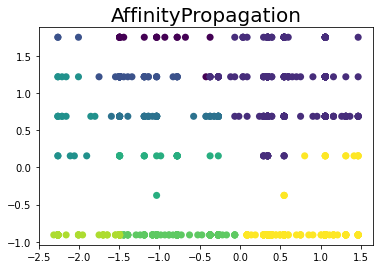

In [579]:
plt.scatter(scaled_df[:,0], scaled_df[:,1],c=mLabels, s=50, edgecolor='none')
plt.title('AffinityPropagation', fontsize = 20)
plt.show()

In [580]:
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, mLabels, metric='euclidean'))
print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, mLabels))
print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, mLabels))


Silhouette Coefficient score:
 0.5176038652781481

Calinski-Harabasz score:
 934.3184362081925

Davies-Bouldin index: 
 0.9013631449751666


### Cluster Model Evaluation 

- Silhouette Coefficient score:
  - The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
  - The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
  
- Calinski-Harabasz score:
  - The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
  - The score is fast to compute.
  
- Davies-Bouldin index:
  - The computation of Davies-Bouldin is simpler than that of Silhouette scores.
  - The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.